# Pytorch homework

### Instructions
- Make a copy of this notebook in your own Colab and complete the questions there.
- You can add more cells if necessary. You may also add descriptions to your code, though it is not mandatory.
- Make sure the notebook can run through by *Runtime -> Run all*. **Keep all cell outputs** for grading.
- Submit the link of your notebook
- Please **enable editing or comments** so that you can receive feedback from TAs.

Install dependencies

In [1]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip3 install torchtext
!pip3 install skorch
!pip3 install matplotlib

Looking in indexes: https://download.pytorch.org/whl/cu118


In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import copy
from scipy.stats import qmc

## 1. Tensor Operations (40 points)

Tensor operations are important in deep learning models. In this part, you are required to implement some common tensor operations in PyTorch.

### 1) Tensor squeezing, unsqueezing and viewing

Tensor squeezing, unsqueezing and viewing are important methods to change the dimension of a Tensor, and the corresponding functions are [torch.squeeze](https://pytorch.org/docs/stable/torch.html#torch.squeeze), [torch.unsqueeze](https://pytorch.org/docs/stable/torch.html#torch.unsqueeze) and [torch.Tensor.view](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.view). Please read the documents of the functions, and finish the following practice.

In [3]:
# x is a tensor with size being (3, 2)
x = torch.Tensor([[1, 2], [3, 4], [5, 6]])
print(f"Original Tensor: {x.shape}")

# [TO DO]
# Add two new dimensions to x by using the function torch.unsqueeze, so that the size of x becomes (3, 1, 2, 1).
x = torch.unsqueeze(torch.unsqueeze(x, 1), -1)
print(f"Unsqueezed Tensor: {x.shape}")

# [TO DO]
# Remove the two dimensions justed added by using the function torch.squeeze, and change the size of x back to (3, 2).
x = torch.squeeze(x, 1).squeeze(-1)
print(f"Squeezed Tensor: {x.shape}")

# [TO DO]
# x is now a two-dimensional tensor, or in other words a matrix. Now use the function torch.Tensor.view and change x to a one-dimensional vector with size being (6).
x = x.view(-1)
print(f"1D Tensor: {x.shape}")

Original Tensor: torch.Size([3, 2])
Unsqueezed Tensor: torch.Size([3, 1, 2, 1])
Squeezed Tensor: torch.Size([3, 2])
1D Tensor: torch.Size([6])


### 2) Tensor concatenation and stack

Tensor concatenation and stack are operations to combine small tensors into big tensors. The corresponding functions are [torch.cat](https://pytorch.org/docs/stable/torch.html#torch.cat) and [torch.stack](https://pytorch.org/docs/stable/torch.html#torch.stack). Please read the documents of the functions, and finish the following practice.

In [4]:
# x is a tensor with size being (3, 2)
x = torch.Tensor([[1, 2], [3, 4], [5, 6]])
print(f"Original X Tensor: {x}")

# y is a tensor with size being (3, 2)
y = torch.Tensor([[-1, -2], [-3, -4], [-5, -6]])
print(f"Original Y Tensor: {y}")

# Our goal is to generate a tensor z with size as (2, 3, 2), and z[0,:,:] = x, z[1,:,:] = y.

# [TO DO]
# Use torch.stack to generate such a z
z = torch.stack((x, y), dim=0)
print(f"Stacked Tensor: {z}")

# [TO DO]
# Use torch.cat and torch.unsqueeze to generate such a z
x = torch.unsqueeze(x, dim=0)
y = torch.unsqueeze(y, dim=0)
z = torch.cat((x, y), dim=0)
print(f"Concatenated Tensor: {z}")

Original X Tensor: tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
Original Y Tensor: tensor([[-1., -2.],
        [-3., -4.],
        [-5., -6.]])
Stacked Tensor: tensor([[[ 1.,  2.],
         [ 3.,  4.],
         [ 5.,  6.]],

        [[-1., -2.],
         [-3., -4.],
         [-5., -6.]]])
Concatenated Tensor: tensor([[[ 1.,  2.],
         [ 3.,  4.],
         [ 5.,  6.]],

        [[-1., -2.],
         [-3., -4.],
         [-5., -6.]]])


### 3) Tensor expansion

Tensor expansion is to expand a tensor into a larger tensor along singleton dimensions. The corresponding functions are [torch.Tensor.expand](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.expand) and [torch.Tensor.expand_as](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.expand_as). Please read the documents of the functions, and finish the following practice.

In [5]:
# x is a tensor with size being (3)
x = torch.Tensor([1, 2, 3])
print(f"Original Tensor: {x.shape}")

# Our goal is to generate a tensor z with size (2, 3), so that z[0,:,:] = x, z[1,:,:] = x.

# [TO DO]
# Change the size of x into (1, 3) by using torch.unsqueeze.
x = x.unsqueeze(0)
print(f"Unsqueezed Tensor: {x.shape}")

# [TO DO]
# Then expand the new tensor to the target tensor by using torch.Tensor.expand.
z = x.expand((2,3))
print(f"Expanded Tensor: {z}")

Original Tensor: torch.Size([3])
Unsqueezed Tensor: torch.Size([1, 3])
Expanded Tensor: tensor([[1., 2., 3.],
        [1., 2., 3.]])


### 4) Tensor reduction in a given dimension

In deep learning, we often need to compute the mean/sum/max/min value in a given dimension of a tensor. Please read the document of [torch.mean](https://pytorch.org/docs/stable/torch.html#torch.mean), [torch.sum](https://pytorch.org/docs/stable/torch.html#torch.sum), [torch.max](https://pytorch.org/docs/stable/torch.html#torch.max), [torch.min](https://pytorch.org/docs/stable/torch.html#torch.min), [torch.topk](https://pytorch.org/docs/stable/torch.html#torch.topk), and finish the following practice.

In [6]:
# x is a random tensor with size being (10, 50)
x = torch.randn(10, 50)
print(f"Original Tensor: {x}")

# [TO DO]
# Compute the mean value for each row of x.
# You need to generate a tensor x_mean of size (10), and x_mean[k, :] is the mean value of the k-th row of x.
x_mean = x.mean(dim=1)
print(f"Mean Tensor: {x_mean}")

# [TO DO]
# Compute the sum value for each row of x.
# You need to generate a tensor x_sum of size (10).
x_sum = x.sum(dim=1)
print(f"Sum Tensor: {x_sum}")

# [TO DO]
# Compute the max value for each row of x.
# You need to generate a tensor x_max of size (10).
x_max, _ = x.max(dim=1)
print(f"Max Tensor: {x_max}")

# [TO DO]
# Compute the min value for each row of x.
# You need to generate a tensor x_min of size (10).
x_min, _ = x.min(dim=1)
print(f"Min Tensor: {x_min}")

# [TO DO]
# Compute the top-5 values for each row of x.
# You need to generate a tensor x_mean of size (10, 5), and x_top[k, :] is the top-5 values of each row in x.
x_top, _ = x.topk(5, dim=1)
print(f"Top Tensor: {x_top}")

Original Tensor: tensor([[ 0.9624, -0.0942,  1.3680,  0.5285, -1.4923,  1.0761, -0.6295, -0.1813,
         -1.6752, -0.4875,  0.5577,  0.8465, -0.5666,  0.6344, -0.9438,  1.8473,
         -0.9522,  0.1329, -0.8980,  0.1485,  1.6980,  0.0751,  1.3391,  1.6503,
         -1.7694,  0.4212, -0.8869,  1.7715,  0.2158, -0.3720,  0.6659, -1.1486,
          0.3294,  0.0362,  0.0440, -1.0487, -0.4591,  1.5739,  0.7035,  0.2243,
         -0.5652, -1.0958, -1.4430, -1.0105, -0.8042, -0.5894, -0.6873,  0.8571,
         -0.3609,  0.2538],
        [ 0.3069, -1.1982,  0.2572, -0.3381, -3.4253,  0.3932, -1.1773, -1.2596,
          0.3172,  1.5204,  0.4048, -1.3816,  0.9664, -0.4721,  0.5907, -0.0907,
          0.2524, -0.0106, -0.2854,  0.6428, -0.5579, -0.1717,  0.8331, -0.8578,
         -0.9001,  0.5430, -2.4478, -0.1731,  0.0788, -0.6565, -0.8929,  0.9178,
          1.7673,  0.0414,  1.1377,  0.4251,  0.6593,  0.4298, -2.4149, -0.4436,
         -0.0572,  0.3643,  0.1423, -1.0814, -0.1217, -2.2288, -

## Convolutional Neural Networks (60 points)



Implement a convolutional neural network for image classification on CIFAR-10 dataset.

CIFAR-10 is an image dataset of 10 categories. Each image has a size of 32x32 pixels. The following code will download the dataset, and split it into `train` and `test`. For this question, we use the default validation split generated by Skorch.

In [7]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
batch_size = 4
train = torchvision.datasets.CIFAR10("./data", train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(train, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
test = torchvision.datasets.CIFAR10("./data", train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(test, batch_size=batch_size,
                                         shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


The following code visualizes some samples in the dataset. You may use it to debug your model if necessary.

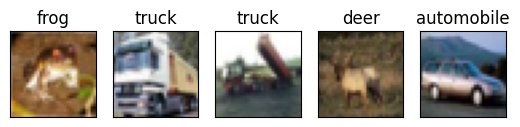

In [8]:
def plot(data, labels=None, num_sample=5):
  n = min(len(data), num_sample)
  for i in range(n):
    plt.subplot(1, n, i+1)
    plt.imshow(data[i], cmap="gray")
    plt.xticks([])
    plt.yticks([])
    if labels is not None:
      plt.title(labels[i])

train.labels = [train.classes[target] for target in train.targets]
plot(train.data, train.labels)

### 1) Basic CNN implementation


Consider a basic CNN model

- It has 3 convolutional layers, followed by a linear layer.
- Each convolutional layer has a kernel size of 3, a padding of 1.
- ReLU activation is applied on every hidden layer.

Please implement this model in the following section. You will need to tune the hyperparameters and fill the results in the table.

#### a) Implement convolutional layers (20 points)

Implement the initialization function and the forward function of the CNN.

In [9]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # implement parameter definitions here
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=8, kernel_size=5, stride=1, padding=0) # CONV1 layer
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding=0) # CONV2 layer
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=0) # CONV3 layer
        self.fc1 = nn.Linear(in_features=32*24*24, out_features=10) # Output layer

    def forward(self, x):
        # implement the forward function here
        x = F.relu(self.conv1(x)) # ReLU activation of CONV1 layer
        x = F.relu(self.conv2(x)) # ReLU activation of CONV2 layer
        x = F.relu(self.conv3(x)) # ReLU activation of CONV3 layer
        x = torch.flatten(x, 1) # Flatten all dimensions except batch
        x = self.fc1(x) # Output layer (softmax activation interpreted from loss function)
        return x
    
model = CNN() # Compile model

In [10]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') # Check if GPU is available
model.to(device) # Move model to the availabe device (GPU/CPU)

CNN(
  (conv1): Conv2d(3, 8, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=18432, out_features=10, bias=True)
)

#### b) Tune hyperparameters (20 points)


Train the CNN model on CIFAR-10 dataset. Tune the number of channels, optimizer, learning rate and the number of epochs for best validation accuracy.

In [11]:
# Initialize hyperparameters
n_epochs = 10 # Number of epochs
loss_fn = nn.CrossEntropyLoss() # Loss function
optimizer = optim.Adam(model.parameters(), lr=1e-4) # Optimizer

In [12]:
# Train the model
best_acc = - np.inf # Init variable to store best accuracy during training
best_wts = None  # Init variable to store weights corresponding to best accuracy
train_loss_hist = [] # Empty list to store training loss history
train_acc_hist = [] # Empty list to store training accuracy history
test_loss_hist = [] # Empty list to store testing loss history
test_acc_hist = [] # Empty list to store testing accuracy history

print('Started Training!')
for epoch in range(n_epochs):
    train_loss = [] # Empty list to store training loss for current epoch
    train_acc = [] # Empty list to store training accuracy for current epoch
    test_loss = [] # Empty list to store testing loss for current epoch
    test_acc = [] # Empty list to store testing accuracy for current epoch
    # Training
    model.train() # Set model in training mode
    for i, data in enumerate(trainloader,0):
        inputs, labels = data[0].to(device), data[1].to(device)
        # Forward propagation
        y_pred = model(inputs) # Get prediction
        loss = loss_fn(y_pred, labels) # Compute training loss
        # Backward propagation
        optimizer.zero_grad() # Set the gradients of all optimized tensors to zero
        loss.backward() # Compute gradients w.r.t. loss
        # Update parameters
        optimizer.step() # Update parameters based on gradients and update law for given optimizer
        # Compute metrics (accuracy and loss)
        acc = (torch.argmax(y_pred, 1) == labels).float().mean() # Compute training accuracy
        loss = float(loss) # Convert to float
        acc = float(acc) # Convert to float
        train_loss.append(loss) # Append current loss value
        train_acc.append(acc) # Append current accuracy value
    # Print training verbose
    train_loss_hist.append(np.mean(train_loss)) # Compute and append mean training loss value
    train_acc_hist.append(np.mean(train_acc)) # Compute and append mean training accuracy value
    # Validation
    model.eval() # Set model in evaluation mode
    for i, data in enumerate(testloader,0):
        inputs, labels = data[0].to(device), data[1].to(device)
        y_pred = model(inputs) # Get predictions on testing set
        loss = loss_fn(y_pred, labels) # Compute testing loss
        acc = (torch.argmax(y_pred, 1) == labels).float().mean() # Compute training accuracy
        loss = float(loss) # Convert to float
        acc = float(acc) # Convert to float
        test_loss.append(loss) # Append testing loss value
        test_acc.append(acc) # Append testing accuracy value
    # Print validation verbose
    test_loss_hist.append(np.mean(test_loss)) # Compute and append mean testing loss value
    test_acc_hist.append(np.mean(test_acc)) # Compute and append mean testing accuracy value
    if np.mean(test_acc) > best_acc: # Compare current accuracy with best so far
        best_acc = np.mean(test_acc) # Update best accuracy
        best_wts = copy.deepcopy(model.state_dict()) # Store params of model that gave best accuracy
    print(f"Epoch {epoch+1}/{n_epochs} | train_loss={round(np.mean(train_loss),4)}, train_acc={round(np.mean(train_acc),4)} | test_loss={round(np.mean(test_loss),4)}, test_acc={round(np.mean(test_acc),4)}") # Print epoch metrics
    
print('Finished Training!')
model.load_state_dict(best_wts) # Load model that gave best accuracy

Started Training!
Epoch 1/10 | train_loss=1.5409, train_acc=0.4474 | test_loss=1.3543, test_acc=0.5113
Epoch 2/10 | train_loss=1.2758, train_acc=0.5484 | test_loss=1.2589, test_acc=0.5511
Epoch 3/10 | train_loss=1.1536, train_acc=0.5953 | test_loss=1.179, test_acc=0.5838
Epoch 4/10 | train_loss=1.0614, train_acc=0.6316 | test_loss=1.1293, test_acc=0.6068
Epoch 5/10 | train_loss=0.9852, train_acc=0.6576 | test_loss=1.1344, test_acc=0.6007
Epoch 6/10 | train_loss=0.9231, train_acc=0.6816 | test_loss=1.0748, test_acc=0.6254
Epoch 7/10 | train_loss=0.8697, train_acc=0.7015 | test_loss=1.0717, test_acc=0.6286
Epoch 8/10 | train_loss=0.8206, train_acc=0.7168 | test_loss=1.0684, test_acc=0.629
Epoch 9/10 | train_loss=0.7778, train_acc=0.7343 | test_loss=1.0705, test_acc=0.6325
Epoch 10/10 | train_loss=0.7356, train_acc=0.7496 | test_loss=1.0983, test_acc=0.6305
Finished Training!


<All keys matched successfully>

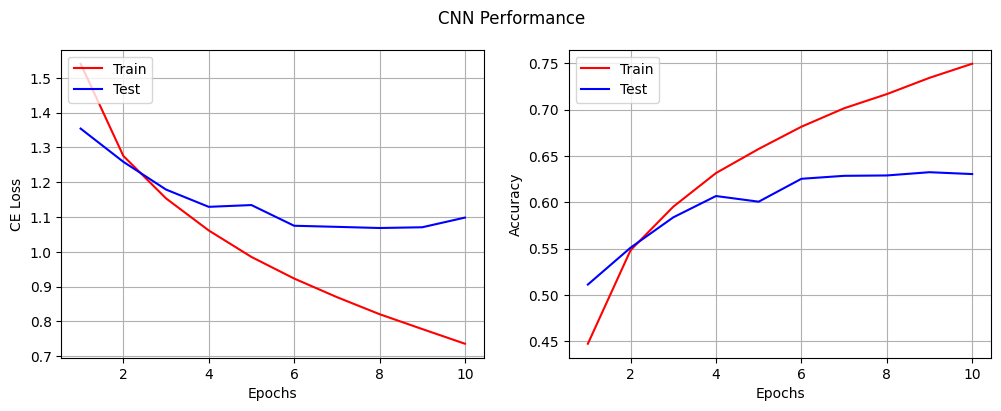

In [13]:
# Visualize the training and testing history including accuracy curves and loss curves
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4)) # Create side-by-side subplots
fig.suptitle('CNN Performance') # Common plot title
# Plot loss curves
ax1.plot(np.linspace(1, n_epochs, n_epochs), train_loss_hist, label='Train', color='red') # Plot train loss
ax1.plot(np.linspace(1, n_epochs, n_epochs), test_loss_hist, label='Test', color='blue') # Plot test loss
ax1.legend(loc='upper left') # Show legend
ax1.set_xlabel('Epochs') # Show label for X-axis
ax1.set_ylabel('CE Loss') # Show label for Y-axis
ax1.grid(True) # Show grid
# Plot accuracy curves
ax2.plot(np.linspace(1, n_epochs, n_epochs), train_acc_hist, label='Train', color='red') # Plot train accuracy
ax2.plot(np.linspace(1, n_epochs, n_epochs), test_acc_hist, label='Test', color='blue') # Plot test accuracy
ax2.legend(loc='upper left') # Show legend
ax2.set_xlabel('Epochs') # Show label for X-axis
ax2.set_ylabel('Accuracy') # Show label for Y-axis
ax2.grid(True) # Show grid

Write down **validation accuracy** of your model under different hyperparameter settings.

**Hint:** You may need more epochs for SGD than Adam.

Follwing is the hyperparameter seach space:

| Hyperparameter | Option 1   | Option 2    | Option 3     | Option 4      |
|----------------|------------|-------------|--------------|---------------|
| #Channels      | {16,32,64} | {32,64,128} | {64,128,256} | {128,256,512} |
| Optimizer      | Adam       | SGD         | RMSProp      | Adagrad       |
| Learning Rate  | 1e-4       | 5e-4        | 1e-5         | 5e-5          |
| #Epochs        | 10         | 15          | 20           | 25            |

Apply Lating Hypercube Sampling (LHS) to come up with hyperparameter sets:

In [14]:
# Sampling space for different hyperparameters
n_channels = [[16,32,64],[32,64,128],[64,128,256],[128,256,512]] # Sampling space for number of channels
optimizer = ["Adam", "SGD", "RMSProp", "Adagrad"] # Sampling space for optimizers
learning_rates = [1e-4, 5e-4, 1e-5, 5e-5] # Sampling space for learning rates
n_epochs = [10, 15, 20, 25] # Sampling space for epochs

# Sampling technique
sampler = qmc.LatinHypercube(d=4, seed=1234) # 5-dimensional Latin hypercube sampling space
samples = sampler.integers(l_bounds=0, u_bounds=4, n=4) # Sample 4 random combinations of hyperparameters in range of int([0, 4)), i.e. {0, 1, 2, 3}
# Sampled hyperparameter sets
h_params_1 = [n_channels[samples[0][0]], optimizer[samples[0][1]], learning_rates[samples[0][2]], n_epochs[samples[0][3]]] # Hyperparameter set 1
h_params_2 = [n_channels[samples[1][0]], optimizer[samples[1][1]], learning_rates[samples[1][2]], n_epochs[samples[1][3]]] # Hyperparameter set 2
h_params_3 = [n_channels[samples[2][0]], optimizer[samples[2][1]], learning_rates[samples[2][2]], n_epochs[samples[2][3]]] # Hyperparameter set 3
h_params_4 = [n_channels[samples[3][0]], optimizer[samples[3][1]], learning_rates[samples[3][2]], n_epochs[samples[3][3]]] # Hyperparameter set 4
# Print sampled hyperparameter sets
print("LHS Sampled Hyperparameter Sets:")
print(h_params_1)
print(h_params_2)
print(h_params_3)
print(h_params_4)
h_params = [h_params_1,h_params_2,h_params_3,h_params_4]

LHS Sampled Hyperparameter Sets:
[[32, 64, 128], 'RMSProp', 5e-05, 25]
[[64, 128, 256], 'SGD', 1e-05, 20]
[[128, 256, 512], 'Adagrad', 0.0001, 15]
[[16, 32, 64], 'Adam', 0.0005, 10]


Started Training Model 1!
Epoch 1/25 | train_loss=1.436, train_acc=0.4859 | test_loss=1.2606, test_acc=0.5545
Epoch 2/25 | train_loss=1.1197, train_acc=0.6067 | test_loss=1.0327, test_acc=0.6391
Epoch 3/25 | train_loss=0.9588, train_acc=0.6671 | test_loss=0.969, test_acc=0.6657
Epoch 4/25 | train_loss=0.8509, train_acc=0.7101 | test_loss=0.918, test_acc=0.6841
Epoch 5/25 | train_loss=0.7646, train_acc=0.7394 | test_loss=0.8962, test_acc=0.6932
Epoch 6/25 | train_loss=0.6927, train_acc=0.7651 | test_loss=0.9092, test_acc=0.6987
Epoch 7/25 | train_loss=0.6257, train_acc=0.7891 | test_loss=0.8799, test_acc=0.7071
Epoch 8/25 | train_loss=0.5662, train_acc=0.8114 | test_loss=0.8842, test_acc=0.7106
Epoch 9/25 | train_loss=0.5075, train_acc=0.8315 | test_loss=0.883, test_acc=0.7118
Epoch 10/25 | train_loss=0.4542, train_acc=0.8505 | test_loss=0.904, test_acc=0.714
Epoch 11/25 | train_loss=0.4012, train_acc=0.8694 | test_loss=0.9586, test_acc=0.7055
Epoch 12/25 | train_loss=0.3502, train_acc=

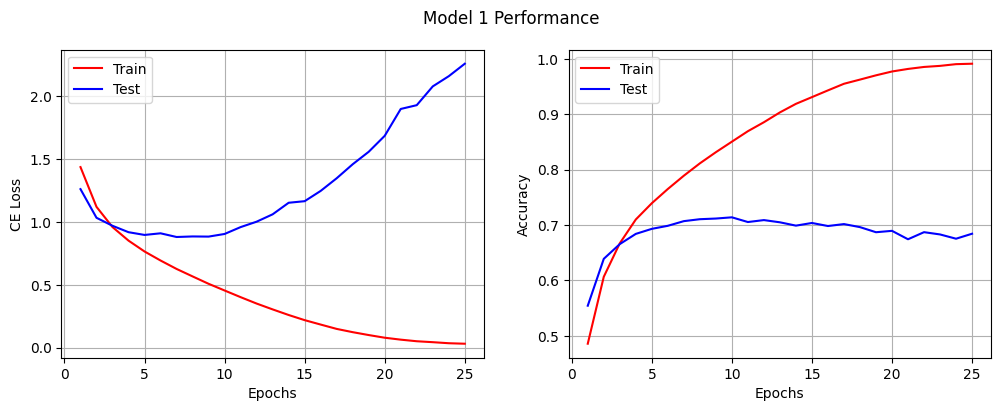

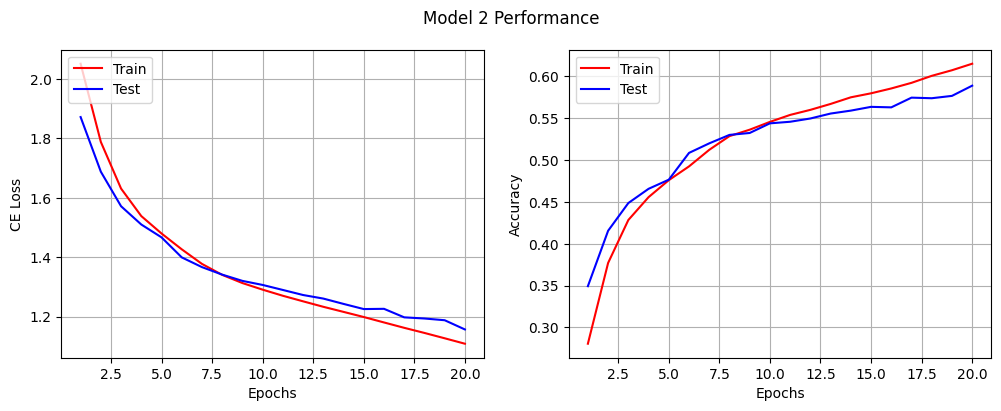

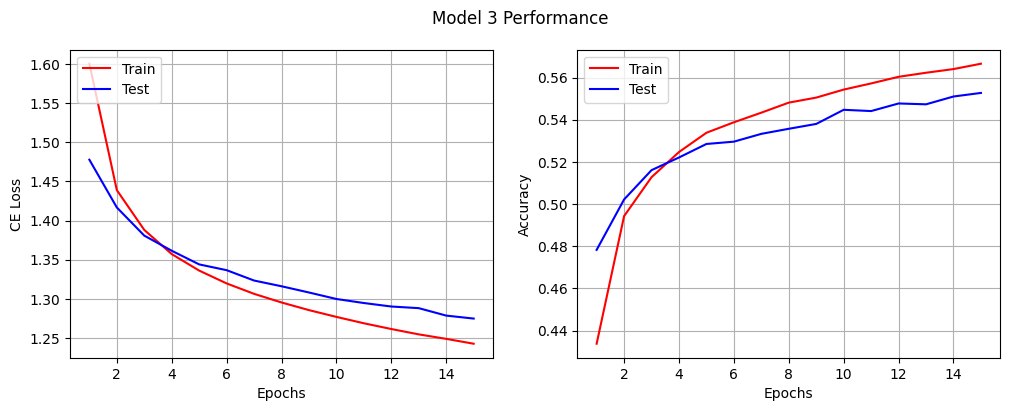

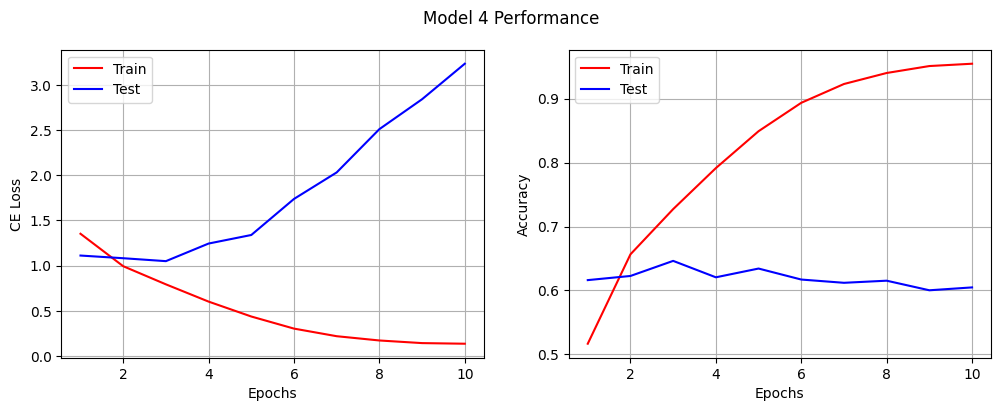

In [16]:
model_id = 0 # Model ID

for h_param in h_params:

    model_id += 1 # Increment iterator

    class CNN(nn.Module):
        def __init__(self):
            super(CNN, self).__init__()
            # implement parameter definitions here
            self.conv1 = nn.Conv2d(in_channels=3, out_channels=h_param[0][0], kernel_size=5, stride=1, padding=0) # CONV1 layer
            # output_size = [(32-5)+1] x [(32-5)+1] = 28x28
            self.conv2 = nn.Conv2d(in_channels=h_param[0][0], out_channels=h_param[0][1], kernel_size=3, stride=1, padding=0) # CONV2 layer
            # output_size = [(28-3)+1] x [(28-3)+1] = 26x26
            self.conv3 = nn.Conv2d(in_channels=h_param[0][1], out_channels=h_param[0][2], kernel_size=3, stride=1, padding=0) # CONV3 layer
            # output_size = [(26-3)+1] x [(26-3)+1] = 24x24
            self.fc1 = nn.Linear(in_features=h_param[0][2]*24*24, out_features=10) # Output layer

        def forward(self, x):
            # implement the forward function here
            x = F.relu(self.conv1(x)) # ReLU activation of CONV1 layer
            x = F.relu(self.conv2(x)) # ReLU activation of CONV2 layer
            x = F.relu(self.conv3(x)) # ReLU activation of CONV3 layer
            x = torch.flatten(x, 1) # Flatten all dimensions except batch
            x = self.fc1(x) # Output layer (softmax activation interpreted from loss function)
            return x
        
    model = CNN() # Compile model

    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') # Check if GPU is available
    model.to(device) # Move model to the availabe device (GPU/CPU)

    # Initialize hyperparameters
    n_epochs = h_param[3] # Number of epochs
    loss_fn = nn.CrossEntropyLoss() # Loss function
    if  h_param[1] == "Adam":
        optimizer = optim.Adam(model.parameters(), lr=h_param[2]) # Optimizer
    elif  h_param[1] == "SGD":
        optimizer = optim.SGD(model.parameters(), lr=h_param[2], momentum=0.9) # Optimizer
    elif  h_param[1] == "RMSProp":
        optimizer = optim.RMSprop(model.parameters(), lr=h_param[2], alpha=0.99, eps=1e-08) # Optimizer
    elif  h_param[1] == "Adagrad":
        optimizer = optim.Adagrad(model.parameters(), lr=h_param[2]) # Optimizer

    # Train the model
    best_acc = - np.inf # Init variable to store best accuracy during training
    best_wts = None  # Init variable to store weights corresponding to best accuracy
    train_loss_hist = [] # Empty list to store training loss history
    train_acc_hist = [] # Empty list to store training accuracy history
    test_loss_hist = [] # Empty list to store testing loss history
    test_acc_hist = [] # Empty list to store testing accuracy history

    print(f"Started Training Model {model_id}!")
    for epoch in range(n_epochs):
        train_loss = [] # Empty list to store training loss for current epoch
        train_acc = [] # Empty list to store training accuracy for current epoch
        test_loss = [] # Empty list to store testing loss for current epoch
        test_acc = [] # Empty list to store testing accuracy for current epoch
        # Training
        model.train() # Set model in training mode
        for i, data in enumerate(trainloader,0):
            inputs, labels = data[0].to(device), data[1].to(device)
            # Forward propagation
            y_pred = model(inputs) # Get prediction
            loss = loss_fn(y_pred, labels) # Compute training loss
            # Backward propagation
            optimizer.zero_grad() # Set the gradients of all optimized tensors to zero
            loss.backward() # Compute gradients w.r.t. loss
            # Update parameters
            optimizer.step() # Update parameters based on gradients and update law for given optimizer
            # Compute metrics (accuracy and loss)
            acc = (torch.argmax(y_pred, 1) == labels).float().mean() # Compute training accuracy
            loss = float(loss) # Convert to float
            acc = float(acc) # Convert to float
            train_loss.append(loss) # Append current loss value
            train_acc.append(acc) # Append current accuracy value
        # Print training verbose
        train_loss_hist.append(np.mean(train_loss)) # Compute and append mean training loss value
        train_acc_hist.append(np.mean(train_acc)) # Compute and append mean training accuracy value
        # Validation
        model.eval() # Set model in evaluation mode
        for i, data in enumerate(testloader,0):
            inputs, labels = data[0].to(device), data[1].to(device)
            y_pred = model(inputs) # Get predictions on testing set
            loss = loss_fn(y_pred, labels) # Compute testing loss
            acc = (torch.argmax(y_pred, 1) == labels).float().mean() # Compute training accuracy
            loss = float(loss) # Convert to float
            acc = float(acc) # Convert to float
            test_loss.append(loss) # Append testing loss value
            test_acc.append(acc) # Append testing accuracy value
        # Print validation verbose
        test_loss_hist.append(np.mean(test_loss)) # Compute and append mean testing loss value
        test_acc_hist.append(np.mean(test_acc)) # Compute and append mean testing accuracy value
        if np.mean(test_acc) > best_acc: # Compare current accuracy with best so far
            best_acc = np.mean(test_acc) # Update best accuracy
            best_wts = copy.deepcopy(model.state_dict()) # Store params of model that gave best accuracy
        print(f"Epoch {epoch+1}/{n_epochs} | train_loss={round(np.mean(train_loss),4)}, train_acc={round(np.mean(train_acc),4)} | test_loss={round(np.mean(test_loss),4)}, test_acc={round(np.mean(test_acc),4)}") # Print epoch metrics
        
    print(f"Finished Training Model {model_id}!")
    model.load_state_dict(best_wts) # Load model that gave best accuracy

    # Visualize the training and testing history including accuracy curves and loss curves
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4)) # Create side-by-side subplots
    fig.suptitle(f"Model {model_id} Performance") # Common plot title
    # Plot loss curves
    ax1.plot(np.linspace(1, n_epochs, n_epochs), train_loss_hist, label='Train', color='red') # Plot train loss
    ax1.plot(np.linspace(1, n_epochs, n_epochs), test_loss_hist, label='Test', color='blue') # Plot test loss
    ax1.legend(loc='upper left') # Show legend
    ax1.set_xlabel('Epochs') # Show label for X-axis
    ax1.set_ylabel('CE Loss') # Show label for Y-axis
    ax1.grid(True) # Show grid
    # Plot accuracy curves
    ax2.plot(np.linspace(1, n_epochs, n_epochs), train_acc_hist, label='Train', color='red') # Plot train accuracy
    ax2.plot(np.linspace(1, n_epochs, n_epochs), test_acc_hist, label='Test', color='blue') # Plot test accuracy
    ax2.legend(loc='upper left') # Show legend
    ax2.set_xlabel('Epochs') # Show label for X-axis
    ax2.set_ylabel('Accuracy') # Show label for Y-axis
    ax2.grid(True) # Show grid

Follwing are the traaining and validation metrics for hyperparameter search experiments:

| Model   | Train Loss | Train Accuracy | Test Loss | Test Accuracy |
|---------|------------|----------------|-----------|---------------|
| Model 1 | 0.0307     | 0.9912         | 2.2585    | 0.6844        |
| Model 2 | 1.1084     | 0.615          | 1.1564    | 0.5888        |
| Model 3 | 1.2424     | 0.5665         | 1.2746    | 0.5527        |
| Model 4 | 0.1367     | 0.9547         | 3.2344    | 0.6048        |

#### c) Use larger CNN model (20 points)

Add more Convolution/BatchNorm/Pooling/DropOut/Linear layers to improve the accuracy. Higher accuracy will get higher grade.

In [64]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # implement parameter definitions here
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=9, stride=1, padding=0) # CONV1 layer
        self.bn1 = nn.BatchNorm2d(num_features=32, eps=1e-05, momentum=0.1) # BN1 layer
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=7, stride=1, padding=0) # CONV2 layer
        self.bn2 = nn.BatchNorm2d(num_features=64, eps=1e-05, momentum=0.1) # BN1 layer
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=5, stride=1, padding=0) # CONV3 layer
        self.bn3 = nn.BatchNorm2d(num_features=128, eps=1e-05, momentum=0.1) # BN1 layer
        # self.conv4 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=0) # CONV4 layer
        # self.bn4 = nn.BatchNorm2d(num_features=128, eps=1e-05, momentum=0.1) # BN1 layer
        self.pool = nn.MaxPool2d(kernel_size=3, stride=1, padding=0) # POOL layer
        # self.dropout = nn.Dropout(p=0.01) # DROP layer
        self.fc1 = nn.Linear(in_features=8192, out_features=128) # FC1 layer
        self.fc2 = nn.Linear(in_features=128, out_features=64) # FC2 layer
        self.fc3 = nn.Linear(in_features=64, out_features=32) # FC3 layer
        self.out = nn.Linear(in_features=32, out_features=10) # Output layer

    def forward(self, x):
        # implement the forward function here
        x = self.pool(F.relu(self.conv1(x))) # POOL1 after ReLU activation of CONV1 layer
        x = self.bn1(x) # Batch normalization
        # x = self.dropout(x) # Dropout
        x = self.pool(F.relu(self.conv2(x))) # POOL2 after ReLU activation of CONV2 layer
        x = self.bn2(x) # Batch normalization
        # x = self.dropout(x) # Dropout
        x = self.pool(F.relu(self.conv3(x))) # POOL3 after ReLU activation of CONV3 layer
        x = self.bn3(x) # Batch normalization
        # x = self.dropout(x) # Dropout
        # x = self.pool(F.relu(self.conv4(x))) # POOL3 after ReLU activation of CONV4 layer
        # x = self.bn4(x) # Batch normalization
        # x = self.dropout(x) # Dropout
        x = torch.flatten(x, 1) # Flatten all dimensions except batch
        x = F.relu(self.fc1(x)) # ReLU activation of FC1 layer
        x = F.relu(self.fc2(x)) # ReLU activation of FC2 layer
        x = F.relu(self.fc3(x)) # ReLU activation of FC3 layer
        x = self.out(x) # Output layer (softmax activation interpreted from loss function)
        return x
    
model = CNN() # Compile model

In [65]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') # Check if GPU is available
model.to(device) # Move model to the availabe device (GPU/CPU)

CNN(
  (conv1): Conv2d(3, 32, kernel_size=(9, 9), stride=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 64, kernel_size=(7, 7), stride=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=3, stride=1, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=8192, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (out): Linear(in_features=32, out_features=10, bias=True)
)

In [69]:
# Initialize hyperparameters
n_epochs = 20 # Number of epochs
loss_fn = nn.CrossEntropyLoss() # Loss function
optimizer = optim.Adam(model.parameters(), lr=1e-4) # Optimizer

In [70]:
# Train the model
best_acc = - np.inf # Init variable to store best accuracy during training
best_wts = None  # Init variable to store weights corresponding to best accuracy
train_loss_hist = [] # Empty list to store training loss history
train_acc_hist = [] # Empty list to store training accuracy history
test_loss_hist = [] # Empty list to store testing loss history
test_acc_hist = [] # Empty list to store testing accuracy history

print('Started Training!')
for epoch in range(n_epochs):
    train_loss = [] # Empty list to store training loss for current epoch
    train_acc = [] # Empty list to store training accuracy for current epoch
    test_loss = [] # Empty list to store testing loss for current epoch
    test_acc = [] # Empty list to store testing accuracy for current epoch
    # Training
    model.train() # Set model in training mode
    for i, data in enumerate(trainloader,0):
        inputs, labels = data[0].to(device), data[1].to(device)
        # Forward propagation
        y_pred = model(inputs) # Get prediction
        loss = loss_fn(y_pred, labels) # Compute training loss
        # Backward propagation
        optimizer.zero_grad() # Set the gradients of all optimized tensors to zero
        loss.backward() # Compute gradients w.r.t. loss
        # Update parameters
        optimizer.step() # Update parameters based on gradients and update law for given optimizer
        # Compute metrics (accuracy and loss)
        acc = (torch.argmax(y_pred, 1) == labels).float().mean() # Compute training accuracy
        loss = float(loss) # Convert to float
        acc = float(acc) # Convert to float
        train_loss.append(loss) # Append current loss value
        train_acc.append(acc) # Append current accuracy value
    # Print training verbose
    train_loss_hist.append(np.mean(train_loss)) # Compute and append mean training loss value
    train_acc_hist.append(np.mean(train_acc)) # Compute and append mean training accuracy value
    # Validation
    model.eval() # Set model in evaluation mode
    for i, data in enumerate(testloader,0):
        inputs, labels = data[0].to(device), data[1].to(device)
        y_pred = model(inputs) # Get predictions on testing set
        loss = loss_fn(y_pred, labels) # Compute testing loss
        acc = (torch.argmax(y_pred, 1) == labels).float().mean() # Compute training accuracy
        loss = float(loss) # Convert to float
        acc = float(acc) # Convert to float
        test_loss.append(loss) # Append testing loss value
        test_acc.append(acc) # Append testing accuracy value
    # Print validation verbose
    test_loss_hist.append(np.mean(test_loss)) # Compute and append mean testing loss value
    test_acc_hist.append(np.mean(test_acc)) # Compute and append mean testing accuracy value
    if np.mean(test_acc) > best_acc: # Compare current accuracy with best so far
        best_acc = np.mean(test_acc) # Update best accuracy
        best_wts = copy.deepcopy(model.state_dict()) # Store params of model that gave best accuracy
    print(f"Epoch {epoch+1}/{n_epochs} | train_loss={round(np.mean(train_loss),4)}, train_acc={round(np.mean(train_acc),4)} | test_loss={round(np.mean(test_loss),4)}, test_acc={round(np.mean(test_acc),4)}") # Print epoch metrics
    
print('Finished Training!')
model.load_state_dict(best_wts) # Load model that gave best accuracy

Started Training!
Epoch 1/20 | train_loss=0.7059, train_acc=0.7541 | test_loss=2.8146, test_acc=0.6923
Epoch 2/20 | train_loss=0.6678, train_acc=0.7661 | test_loss=1.49, test_acc=0.6933
Epoch 3/20 | train_loss=0.653, train_acc=0.7709 | test_loss=1.8683, test_acc=0.6951
Epoch 4/20 | train_loss=0.6419, train_acc=0.7752 | test_loss=1.8014, test_acc=0.6996
Epoch 5/20 | train_loss=0.6289, train_acc=0.7801 | test_loss=2.5013, test_acc=0.6954
Epoch 6/20 | train_loss=0.6187, train_acc=0.7842 | test_loss=2.553, test_acc=0.6932
Epoch 7/20 | train_loss=0.6147, train_acc=0.7847 | test_loss=3.0817, test_acc=0.6929
Epoch 8/20 | train_loss=0.5989, train_acc=0.7899 | test_loss=2.49, test_acc=0.6907
Epoch 9/20 | train_loss=0.5991, train_acc=0.7902 | test_loss=2.2901, test_acc=0.6969
Epoch 10/20 | train_loss=0.5949, train_acc=0.7911 | test_loss=2.3111, test_acc=0.6953
Epoch 11/20 | train_loss=0.5885, train_acc=0.7935 | test_loss=1.6603, test_acc=0.6954
Epoch 12/20 | train_loss=0.5779, train_acc=0.7965 |

<All keys matched successfully>

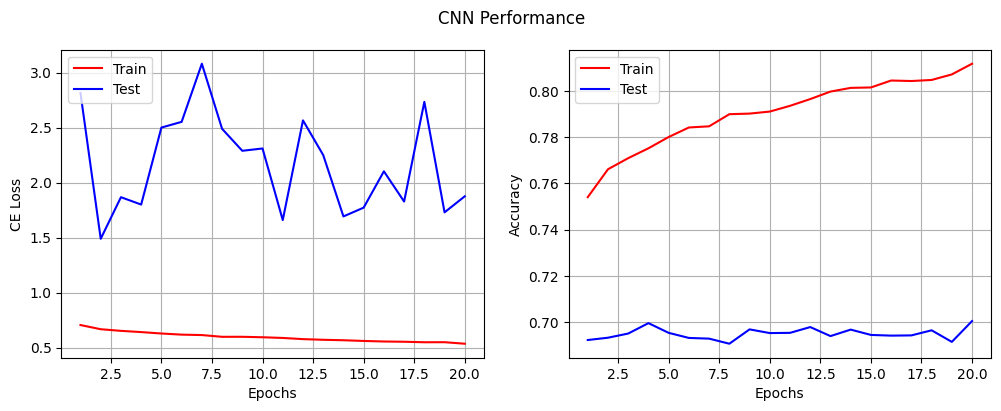

In [71]:
# Visualize the training and testing history including accuracy curves and loss curves
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4)) # Create side-by-side subplots
fig.suptitle('CNN Performance') # Common plot title
# Plot loss curves
ax1.plot(np.linspace(1, n_epochs, n_epochs), train_loss_hist, label='Train', color='red') # Plot train loss
ax1.plot(np.linspace(1, n_epochs, n_epochs), test_loss_hist, label='Test', color='blue') # Plot test loss
ax1.legend(loc='upper left') # Show legend
ax1.set_xlabel('Epochs') # Show label for X-axis
ax1.set_ylabel('CE Loss') # Show label for Y-axis
ax1.grid(True) # Show grid
# Plot accuracy curves
ax2.plot(np.linspace(1, n_epochs, n_epochs), train_acc_hist, label='Train', color='red') # Plot train accuracy
ax2.plot(np.linspace(1, n_epochs, n_epochs), test_acc_hist, label='Test', color='blue') # Plot test accuracy
ax2.legend(loc='upper left') # Show legend
ax2.set_xlabel('Epochs') # Show label for X-axis
ax2.set_ylabel('Accuracy') # Show label for Y-axis
ax2.grid(True) # Show grid

The new model gives over 70% validation accuracy! This is better than any of the earlier models.